In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import h5py 


In [77]:

# --  parameters
det_shape  = [2399,2399]

# -- paths
file_path = '/UserData/maddalena/sacla2022/02-h5compression/1192416_331209002_331209602.h5'
tag_path = 'run_%s/detector_2d_assembled_1/'%run
pathUtilities='/UserData/maddalena/sacla2022/04-utilities/'

# load h5 file
f = h5py.File(file_path, 'r')

tags=f[f'/run_{run}/event_info/tag_number_list']
img = np.zeros(det_shape)
for i in tags:
    img_path = f'/run_{run}/detector_2d_assembled_1/tag_{i}/detector_data'
    img += np.array(f[img_path])
img /= len(tags)

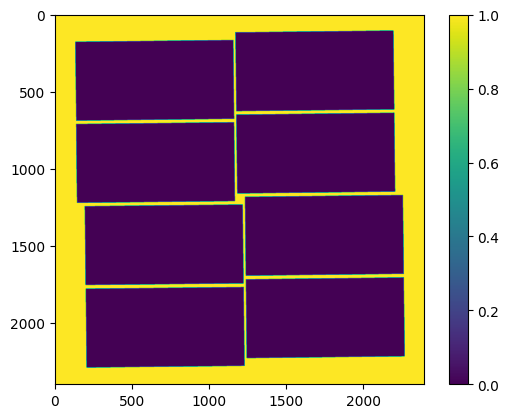

In [ ]:
# mask
data=f['/run_'+str(run)+'/detector_2d_assembled_1/tag_'+str(f['/run_'+str(run)+'/event_info/tag_number_list'][0])+'/detector_data'][:]
mask=data[:,:]==0
plt.figure()
plt.imshow(mask,vmin=0,vmax=1)
plt.colorbar()


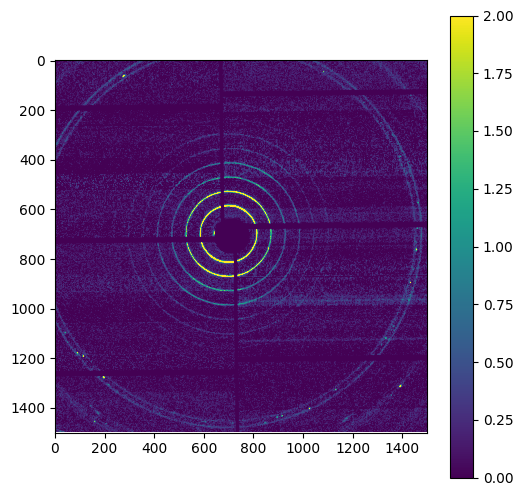

In [93]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 2399)
y = np.arange(0, 2399)

cx = 1100+112.
cy = 1100+111
r = 71

# The two lines below could be merged, but I stored the mask
# for code clarity.
region = (x[np.newaxis,:]-cx)**2 + (y[:,np.newaxis]-cy)**2 < r**2
mask=data[:,:]==0
mask[region] = 1.


tot=~mask*img

# This plot shows that only within the circle the value is set to 123.
plt.figure(figsize=(6, 6))
plt.imshow(tot[500:2000,500:2000,],vmin=0,vmax=2)
plt.colorbar()
plt.show()

In [92]:
np.save(pathUtilities+'mask.npy',mask)

In [12]:
ls -hrtl /UserData/maddalena/sacla2022/04-utilities/

total 5.6M
-rwxrwxrwx 1 maddalena maddalena  354 Oct 29 06:17 geometry_1192411.poni*
-rwxrwxrwx 1 maddalena maddalena  352 Oct 29 06:48 geometry_1192413.poni*
-rwxrwxrwx 1 maddalena maddalena 5.5M Oct 29 07:24 mask.npy*
